<a href="https://colab.research.google.com/github/BI-DS/EBA-3530/blob/main/Lecture_4/students_gpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Correlation between LSAT and GPA scores
In this example, we will look into the correlation beween Law School admission test (LSAT) scores and grade point average scores in Law School.

I refer to the correlation coefficient $\rho$ as the parameter of interest and it is denoted by $\theta$.

In [2]:
url = 'https://raw.githubusercontent.com/BI-DS/EBA-3530/main/Lecture_4/students.csv'
x = pd.read_csv(url, delimiter=',', header=None).values
np.corrcoef(x[0:5,0],x[0:5,1])

array([[1.        , 0.71671206],
       [0.71671206, 1.        ]])

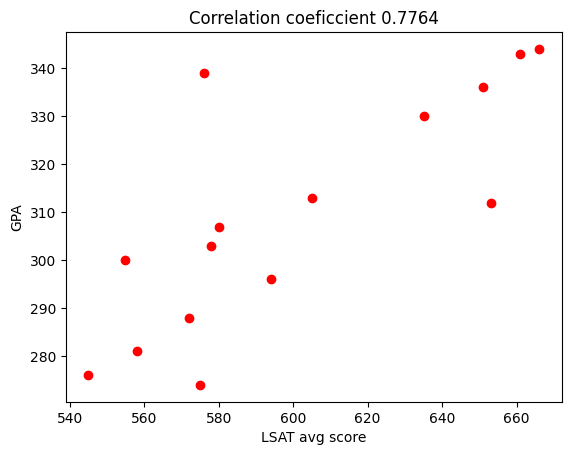

In [3]:
url = 'https://raw.githubusercontent.com/BI-DS/EBA-3530/main/Lecture_4/students.csv'
x = pd.read_csv(url, delimiter=',', header=None).values
correlation = np.corrcoef(x[:,0],x[:,1])[0,1]
plt.figure()
plt.scatter(x[:,0],x[:,1],marker='o',c='r')
plt.xlabel('LSAT avg score')
plt.ylabel('GPA')
plt.title('Correlation coeficcient {:.4f}'.format(correlation))
plt.show()


The straight forward estimate for $\rho(lsat,gpa)$ is $\hat{\theta}=0.7764$, which suggests a strong correlatios between the admission scores (LSAT) and the grade point average (GPA). Given we only have 15 observarions to estimate the correlation coefficient, we can use non-parametric boorstrapping tenchiniques to get an approximation for the $\theta$ distribution and its uncertainty.

In [4]:
B = 999
N = 15

For each bootstrap sample $\{x_i^b\}$, we estimate $\rho=\hat{\theta}_b^*$.

In [5]:
# list to save the bootstrapped b_1 values
corr_bootstrp=[]
for b in range(B):
    # sampling (only an index) with replacement
    indx_boot = np.random.choice(x.shape[0], size=N)

    # use the index to sample (with replacement) x and y
    lsta  = x[indx_boot,0]
    gpa   = x[indx_boot,1]

    # get correlation coef
    corr_b = np.corrcoef(lsta,gpa)[0,1]

    # append estimate
    corr_bootstrp.append(corr_b)

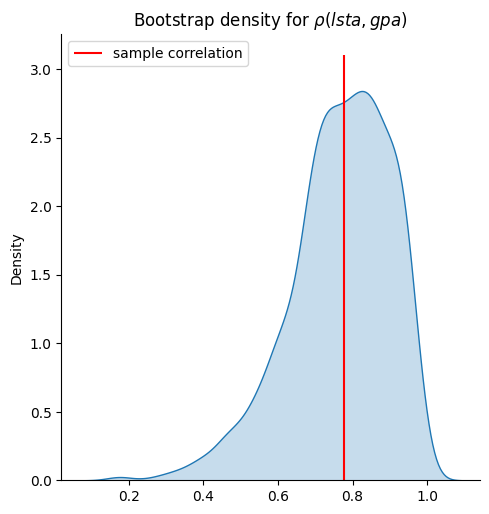

In [6]:
sns.displot(corr_bootstrp,kind='kde',fill=True)
plt.vlines(x=correlation,ymin=0,ymax=3.1,colors='r',label='sample correlation')
plt.legend(loc=2)
plt.title(r'Bootstrap density for $\rho(lsta,gpa)$')
plt.show()

Assuming that the bootstrap estimate $\hat{\theta}_b^*$ has the distirbution
\begin{equation}
\hat{\theta}_b^* \sim N(\hat{\theta}, s.e.^2)
\end{equation}
where

\begin{equation}
s.e. \approx \sqrt{\frac{1}{B-1}\sum_{b=1}^B (\theta_b^* -\bar{\theta}^*)^2} \quad and \\
\bar{\theta^*}=\frac{1}{B}\sum_{b=1}^B\hat{\theta}^*
\end{equation}


In [7]:
bootsrp_bias = np.mean(corr_bootstrp) - correlation
bootsrp_std = np.std(corr_bootstrp)
bootsrp_mean = np.mean(corr_bootstrp)
print('The bootstrap estimte for the correlation is {0:.4f}, with std {1:.4f} and bias {2:.4f}'\
      .format(bootsrp_mean,bootsrp_std,bootsrp_bias))

The bootstrap estimte for the correlation is 0.7671, with std 0.1345 and bias -0.0093


In [8]:
print(correlation-1.96*bootsrp_std, correlation+1.96*bootsrp_std)

0.5126869160650227 1.0400620665137916
